<a href="https://colab.research.google.com/github/svenschultze/Lidar-Localization-DL/blob/main/notebooks/worst_coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget -q http://dev.sschultze.de:9999/residual_gazebo.h5
! pip install -q git+https://github.com/svenschultze/Lidar-Localization-DL

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import lldl

### Load dataset, model, and sort data by performance

In [3]:
x, y = lldl.dataset.load("gazebo")

Loading LiDAR data...


100%|██████████| 12/12 [00:06<00:00,  1.98it/s]


Loading coordinate data...


100%|██████████| 12/12 [00:00<00:00, 16.29it/s]


In [4]:
model = lldl.model.load("residual")
model.load_weights("residual_gazebo.h5")

In [5]:
predictions = model.predict(x)

In [6]:
errors = list(map(lambda gt_pred: np.linalg.norm(gt_pred[0]-gt_pred[1]), zip(y, predictions)))
sorted_samples = sorted(list(zip(x, y, predictions, errors)), key=lambda s: s[3], reverse=True)

# Visualize worst predictions from dataset
We visualize the worst performing coordinates from our dataset on this model. It shows that the model performs worse in specific areas of the apartment, especially close to walls. We argue that this is a result of the generation method of our dataset. By teleporting the robot to random coordinates within the apartment, it might have occasionally glitched into walls or objects, which would insert corrupt LiDAR scans into the dataset. Another interesting phenomenon are errors in the top-left outside of the apartment, at roughtly the same distance to the wall as the width of the smaller rooms. This shows that the network estimates the position based on the distance to detected walls, and maybe even more notably on the distance and position of corners. This decision process seems to slightly alter the prediction at this spot, confusing it with rooms with similar distances to walls and corners.

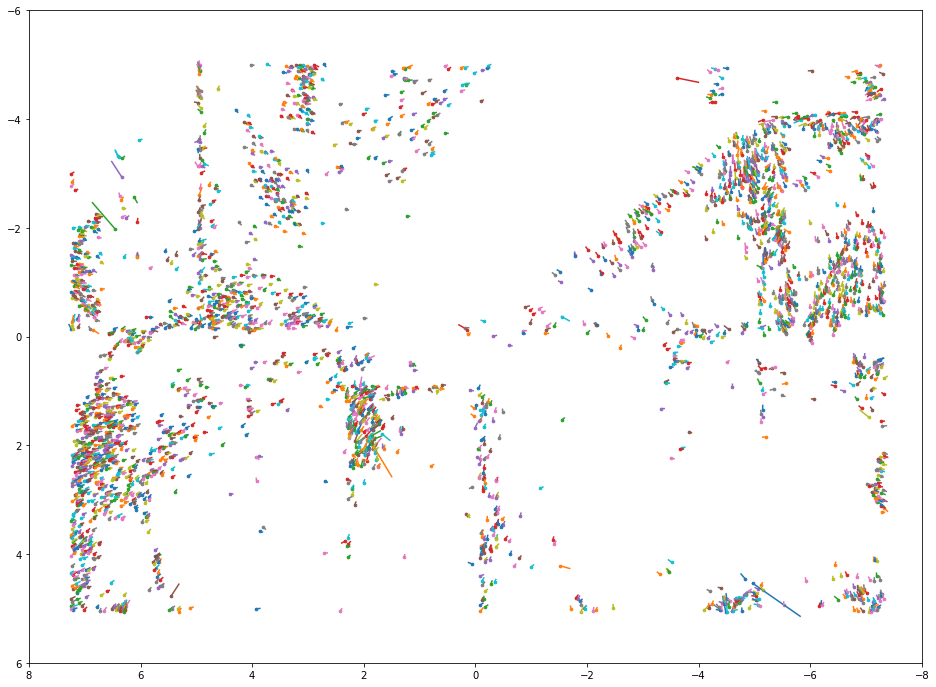

In [7]:
plt.figure(figsize=(16, 12))
plt.xlim((8, -8))
plt.ylim((6, -6))
for _, (ox, oy), (dx, dy), _ in sorted_samples[:len(sorted_samples) // 10]:
    plt.plot([ox, dx],  [oy, dy])
    plt.scatter([ox], [oy], s=7)

plt.show()